In [ ]:
! pip install tensorflow
! pip install keras

# **Model of car data defection **

Found 976 images belonging to 6 classes.
Found 241 images belonging to 6 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 371s 10s/step - accuracy: 0.3968 - loss: 1.4889 - val_accuracy: 0.4772 - val_loss: 1.2762
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 158s 4s/step - accuracy: 0.4408 - loss: 1.3932 - val_accuracy: 0.4772 - val_loss: 1.2803
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 221s 5s/step - accuracy: 0.4485 - loss: 1.3295 - val_accuracy: 0.4772 - val_loss: 1.2865
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 179s 4s/step - accuracy: 0.4441 - loss: 1.3643 - val_accuracy: 0.4772 - val_loss: 1.2815
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 152s 4s/step - accuracy: 0.4604 - loss: 1.3811 - val_accuracy: 0.4772 - val_loss: 1.2791
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 153s 4s/step - accuracy: 0.4747 - loss: 1.3066 - val_accuracy: 0.4772 - val_loss: 1.2722
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 160s 4s/step - accuracy: 0.4394 - loss: 1.3459 - val_accuracy: 0.4772 - val_loss: 1.2672
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 156s 4s/step - accuracy: 0.4564 - loss: 1.3295 - val_accuracy: 0.4772 - val_loss: 1

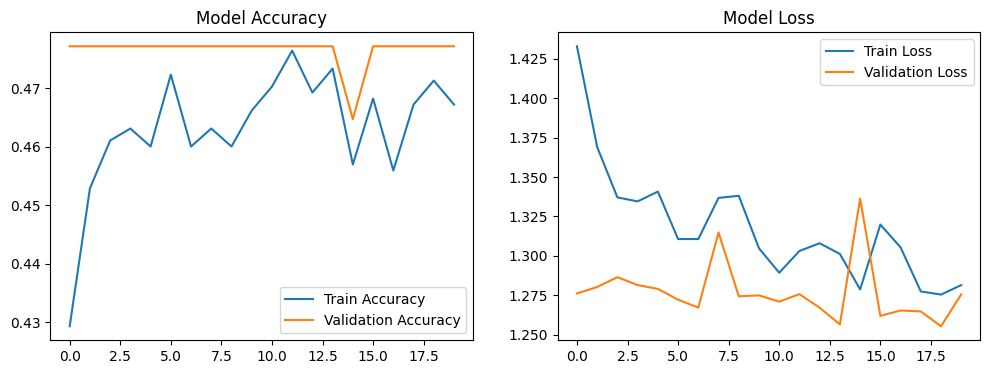

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset (assuming you have a folder structure suitable for ImageDataGenerator)
# Example folder structure:
# dataset/
# ├── break/
# ├── crack/
# ├── dent/
# ├── paint_defect/
# └── scratch/

data_dir = "/content/drive/MyDrive/defects"

# ImageDataGenerator for data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2,  # Use 20% for validation
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


In [ ]:
import numpy as np

# Load a sample image and preprocess it
from tensorflow.keras.preprocessing import image

img_path = '/content/drive/MyDrive/test/break/front_0014 copy.jpg'  # Replace with the path to your test image
img = image.load_img(img_path, target_size=(128, 128))  # Resize to match input size
img_array = image.img_to_array(img) / 255.0  # Normalize to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted Class: {predicted_class}")


# **Save the model in h5**

In [ ]:
# Save the model in .h5 format
model.save("defect_detection_model.h5")
from tensorflow.keras.models import load_model

# Load the model
model = load_model("defect_detection_model.h5")

# **backend of this model**

In [1]:
!pip install fastapi uvicorn tensorflow pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 5.2 MB/s eta 0:00:00


In [3]:
!pip install python-multipart

In [4]:
from fastapi import FastAPI, File, UploadFile
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from typing import List
import numpy as np
from PIL import Image
import io

# Load your trained model
model = load_model("/content/drive/MyDrive/defect_detection_model.h5")  # Update with your model's path
class_labels = ["break", "crack", "dent", "paint_defect", "scratch"]  # Update with actual labels

# Initialize FastAPI app
app = FastAPI()

def prepare_image(img: Image.Image) -> np.ndarray:
    """Preprocess the image to the correct format for prediction."""
    img = img.resize((128, 128))  # Resize to match model's input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Normalize the image
    return img_array

@app.post("/predict")
async def predict(file: UploadFile = File(...)):
    """Predict the defect type from an uploaded image."""
    # Read and preprocess the image
    contents = await file.read()
    img = Image.open(io.BytesIO(contents)).convert("RGB")
    img_array = prepare_image(img)

    # Perform prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    predicted_label = class_labels[predicted_class]
    confidence = predictions[0][predicted_class]

    # Return prediction result
    return {"defect_type": predicted_label, "confidence": float(confidence)}

# Start the server by running: uvicorn filename:app --reload


# **Create traning and testing data**

In [6]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Specify the dataset directory
data_dir = "/content/drive/MyDrive/defects"  # Replace with your dataset folder path
output_dir = "/content/drive/MyDrive"  # Directory to store the split dataset

# Categories (subfolders in the dataset)
categories = os.listdir(data_dir)

# Create train and test directories
train_dir = os.path.join(output_dir, "train")
test_dir = os.path.join(output_dir, "test")
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Split the dataset for each category
for category in categories:
    category_path = os.path.join(data_dir, category)

    if os.path.isdir(category_path):  # Ensure it's a directory
        # Create subdirectories for the category in train and test folders
        os.makedirs(os.path.join(train_dir, category), exist_ok=True)
        os.makedirs(os.path.join(test_dir, category), exist_ok=True)

        # Get all image file paths in the category
        images = [os.path.join(category_path, img) for img in os.listdir(category_path) if img.endswith(('png', 'jpg', 'jpeg'))]

        # Split into train and test (80:20 ratio)
        train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

        # Move images to the respective folders
        for img in train_images:
            shutil.copy(img, os.path.join(train_dir, category))
        for img in test_images:
            shutil.copy(img, os.path.join(test_dir, category))

print("Dataset split complete!")


Dataset split complete!


In [5]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam  # Import your desired optimizer

# Load your trained model
model = load_model("/content/drive/MyDrive/defect_detection_model.h5")  # Update with your model's path
class_labels = ["break", "crack", "dent", "paint_defect", "scratch"]  # Update with actual labels

# Recompile the model with a new optimizer
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Set a learning rate suitable for fine-tuning
    loss="categorical_crossentropy",  # Adjust if using binary classification (use 'binary_crossentropy')
    metrics=["accuracy"]
)

# Define data generators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2  # Split a portion of the data for validation
)

train_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/train",
    target_size=(128, 128),  # Match your model's input size
    batch_size=32,          # Choose an appropriate batch size
    class_mode="categorical",  # Adjust according to your problem (binary/categorical)
    subset="training"       # Use this subset for training
)

validation_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/test",  # Use the same directory as above
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    subset="validation"  # Use this subset for validation
)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,                # Number of epochs
    validation_data=validation_generator  # Validation dataset
)


Found 778 images belonging to 6 classes.
Found 48 images belonging to 6 classes.
Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 129s 4s/step - accuracy: 0.4955 - loss: 1.2654 - val_accuracy: 0.4792 - val_loss: 1.3024
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - accuracy: 0.4621 - loss: 1.2897 - val_accuracy: 0.4792 - val_loss: 1.3059
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 112s 4s/step - accuracy: 0.4722 - loss: 1.2272 - val_accuracy: 0.4792 - val_loss: 1.3147
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 136s 3s/step - accuracy: 0.4969 - loss: 1.1848 - val_accuracy: 0.4792 - val_loss: 1.3168
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 102s 3s/step - accuracy: 0.4805 - loss: 1.1941 - val_accuracy: 0.4792 - val_loss: 1.3040
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step - accuracy: 0.4834 - loss: 1.1578 - val_accuracy: 0.4792 - val_loss: 1.3459
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step - accuracy: 0.4598 - loss: 1.1340 - val_accuracy: 0.4792 - val_loss: 1.3182
Epoch 8/20
25/25 ━━━━━━━━━━━━━

In [6]:
model.save("car_defect_model.h5")  # Save model in HDF5 format
# Save the model in .h5 format
from tensorflow.keras.models import load_model

# Load the model
model = load_model("car_defect_model.h5")

# **Testing of model**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Predicted Class: [0]


In [8]:
class_labels = ["break", "crack", "dent", "paint_defect", "scratch"]
predicted_class = class_labels[0]
print(f"Predicted Class: {predicted_class}")

Predicted Class: break


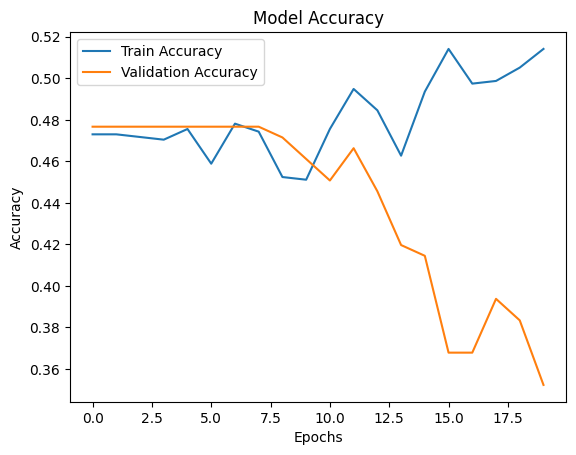

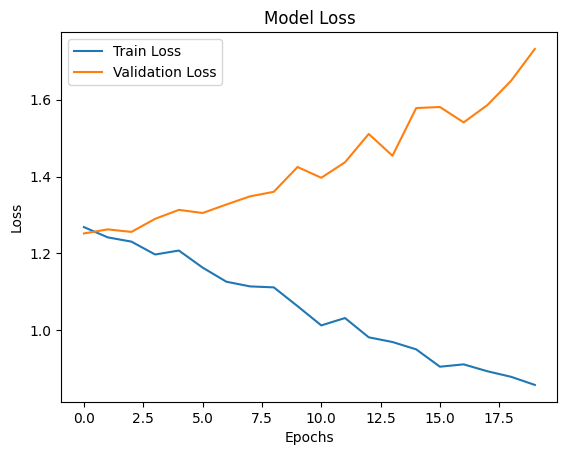

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("car_defect_model.h5")

# Predict using the loaded model
predictions = loaded_model.predict(img_array)
print(f"Predictions: {predictions}")


Found 1217 images belonging to 6 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 152s 4s/step - accuracy: 0.8028 - loss: 1.1090
Test Accuracy: 0.47
39/39 ━━━━━━━━━━━━━━━━━━━━ 134s 3s/step
Classification Report:
              precision    recall  f1-score   support

         all       0.47      1.00      0.64       575
       break       0.00      0.00      0.00        26
       crack       0.00      0.00      0.00        29
        dent       0.00      0.00      0.00        57
paint_defect       0.00      0.00      0.00       146
     scratch       0.00      0.00      0.00       384

    accuracy                           0.47      1217
   macro avg       0.08      0.17      0.11      1217
weighted avg       0.22      0.47      0.30      1217



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


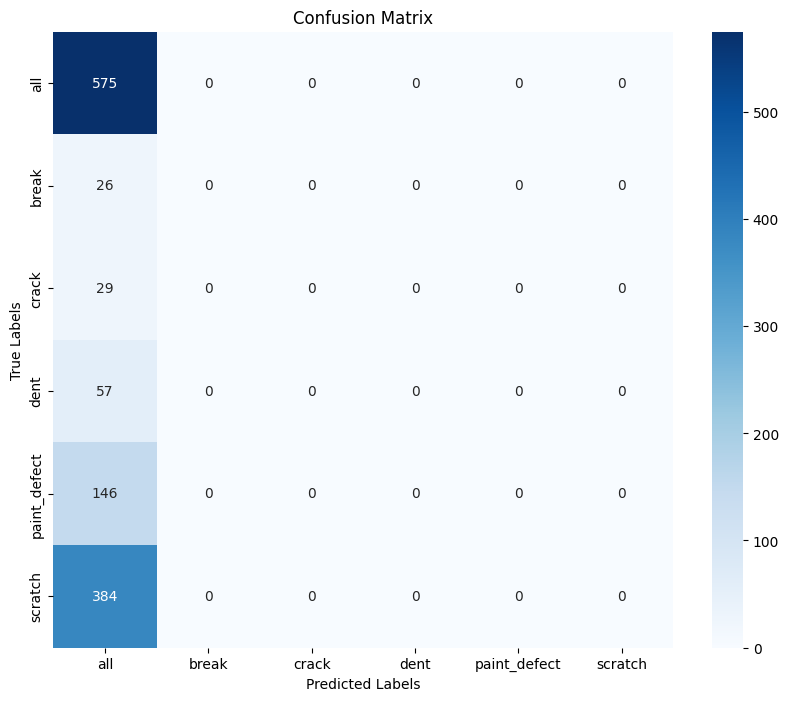

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a separate test directory similar to the training/validation structure
test_dir = "/content/drive/MyDrive/defects"

# ImageDataGenerator for the test set with only rescaling (no augmentation)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important to keep labels consistent
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict the classes on the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels
y_true = test_generator.classes

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# **SET DATA REGIX.SOL**

In [1]:
!pip install pandas openpyxl
!pip install web3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.3/278.3 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 70.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from web3 import Web3

# Connect to the Ethereum network
w3 = Web3(Web3.HTTPProvider("http://localhost:8545/0x3d33C01bCC36ac6A8f872599A9c9351c11Ef07E7"))

# Load the contract
with open("/content/drive/MyDrive/OEMQualityAssurance.abi", "r") as abi_file:  # Replace with your ABI file
    contract_abi = abi_file.read()

contract_address = "0x3d33C01bCC36ac6A8f872599A9c9351c11Ef07E7"  # Replace with your deployed contract address
contract = w3.eth.contract(address=contract_address, abi=contract_abi)

# Account setup
owner_account = " 0x5B38Da6a701c568545dCfcB03FcB875f56beddC4"  # Replace with your account
private_key = "YourPrivateKey"  # Replace with your private key

# Function to set threshold
def set_threshold(material_id, weight, strength, composition):
    txn = contract.functions.setThreshold(material_id, weight, strength, composition).buildTransaction({
        'from': owner_account,
        'nonce': w3.eth.get_transaction_count(owner_account),
        'gas': 2000000,
        'gasPrice': w3.to_wei('50', 'gwei')
    })
    signed_txn = w3.eth.account.sign_transaction(txn, private_key=private_key)
    tx_hash = w3.eth.send_raw_transaction(signed_txn.rawTransaction)
    print(f"Threshold set for Material ID {material_id}. Transaction hash: {tx_hash.hex()}")

# Load the Excel file
def process_excel(file_path):
    # Read the Excel file
    data = pd.read_excel(file_path)

    # Iterate through the rows and set thresholds
    for index, row in data.iterrows():
        material_id = int(row['Material ID'])
        weight = int(row['Weight'])
        strength = int(row['Strength'])
        composition = int(row['Composition'])

        # Set the threshold for the material
        set_threshold(material_id, weight, strength, composition)

# Example usage
excel_file_path = "/path/to/your/material_data.xlsx"  # Replace with your Excel file path
process_excel(excel_file_path)
